In [1]:
'''
Para guardar y cargar modelos, el codigo esta abajo del todo, propongo un modelo dentro de la carpeta models ya 
entrenado.


En esta red, pretendo clasificar vehiculos segun sus formas dadas unas serie de caracteristicas;
la clasificacion es en 'bus' 'van' 'saab' 'opel' 

Los mejores resultados que he llegado a obtener es de un 70-80%
'''

import pandas as pd
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import initializers
import numpy as np
from sklearn.model_selection import train_test_split

names = ['compactness','circularity','distance_circularity','radius_ratio','pr_axis_aspect_ratio','max_length_aspect_ratio',
'scatter_ratio','elongatedness','pr_axis_rectangularity','max_length_rectangularity','scaled_variance_major_axis',
'scaled_variance_minor_axis','scaled_radius_gyration','skewness_major_axis','skewness_minor_axis','kurtosis_minor_axis',
'kurtosis_major_axis','hollows_ratio','class']
data = pd.read_csv("vehicle_silhouette.csv", names=names)
D=pd.get_dummies(data,columns=["class"])
normD=(D-D.min())/(D.max()-D.min())
normD.head()
#D

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,...,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,class_bus,class_opel,class_saab,class_van
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,...,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,0.0,0.0,0.0,1.0
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,...,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,0.0,0.0,0.0,1.0
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,...,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,0.0,0.0,1.0,0.0
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,...,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,0.0,0.0,0.0,1.0
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,...,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,1.0,0.0,0.0,0.0


In [2]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(normD, test_size=0.2)
Xtrain=train.loc[:,'compactness':'hollows_ratio']
Ytrain=train.loc[:,'class_bus':'class_van']
Xtest=test.loc[:,'compactness':'hollows_ratio']
Ytest=test.loc[:,'class_bus':'class_van']

Xtrain

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
533,0.347826,0.307692,0.319444,0.131004,0.131868,0.075472,0.071895,0.828571,0.000000,0.271429,0.094737,0.046763,0.257862,0.223684,0.545455,0.073171,0.333333,0.233333
179,0.347826,0.423077,0.416667,0.144105,0.120879,0.075472,0.156863,0.657143,0.083333,0.400000,0.200000,0.106715,0.358491,0.250000,0.454545,0.073171,0.333333,0.200000
423,0.260870,0.461538,0.416667,0.069869,0.076923,0.094340,0.241830,0.542857,0.166667,0.385714,0.205263,0.170264,0.484277,0.289474,0.363636,0.097561,0.166667,0.100000
73,0.000000,0.153846,0.180556,0.030568,0.076923,0.075472,0.091503,0.828571,0.083333,0.142857,0.026316,0.051559,0.238994,0.302632,0.045455,0.365854,0.000000,0.100000
542,0.434783,0.230769,0.638889,0.331878,0.131868,0.132075,0.359477,0.371429,0.250000,0.228571,0.294737,0.280576,0.125786,0.052632,0.272727,0.414634,0.700000,0.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.456522,0.576923,0.652778,0.253275,0.186813,0.150943,0.294118,0.485714,0.250000,0.614286,0.257895,0.214628,0.484277,0.210526,0.181818,0.365854,0.266667,0.466667
635,0.521739,0.307692,0.305556,0.126638,0.098901,0.094340,0.117647,0.742857,0.083333,0.357143,0.147368,0.075540,0.301887,0.250000,0.227273,0.170732,0.266667,0.166667
810,0.521739,0.846154,0.875000,0.406114,0.175824,0.169811,0.673203,0.142857,0.583333,0.771429,0.468421,0.591127,0.691824,0.210526,0.227273,0.585366,0.300000,0.433333
842,0.347826,0.500000,0.611111,0.257642,0.208791,0.169811,0.307190,0.485714,0.250000,0.585714,0.226316,0.220624,0.421384,0.171053,0.045455,0.487805,0.333333,0.533333


In [3]:
normal=initializers.RandomNormal()
uniform=initializers.RandomUniform()
he=initializers.he_normal(seed=None)

'''
#modelo con pocas capas, obtengo un underfitting claro.
# Usando Sgd.Obtencion de un 25-30% de acierto

model = Sequential()
model.add(Dense(24, input_dim=18, activation='relu', kernel_initializer=he))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(4, kernel_initializer=he, activation='softmax'))
'''

'''
model = Sequential()
model.add(Dense(42, input_dim=18, activation='relu', kernel_initializer=he))
model.add(Dense(22, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(4, kernel_initializer=he, activation='softmax'))
'''

'''
#Usando Sgd. Obtencion de un38-42%, se sigue obteniendo underfitting
#Usando Adam subimos a un 60-62%. #metiendo una capa mas, se reducen sustancialmente los resultados

model = Sequential()
model.add(Dense(64, input_dim=18, activation='relu', kernel_initializer=he))
model.add(Dense(32, activation='sigmoid'))
#model.add(Dense(16, activation='sigmoid'))
model.add(Dense(4, kernel_initializer=he, activation='softmax'))
'''

#mismo modelo que el primero pero con Adam, obtengo el 70-80%
model = Sequential()
model.add(Dense(24, input_dim=18, activation='relu', kernel_initializer=he))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(4, kernel_initializer=he, activation='softmax'))

In [10]:
Adam=optimizers.Adam(lr=0.1)
Sgd=optimizers.SGD(lr=0.02, momentum=0.09,decay=0.01)
RMSprop=optimizers.RMSprop()
Adagrad=optimizers.Adagrad()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
history=model.fit(Xtrain, Ytrain,
                  epochs=200,
                  batch_size=10,
                  validation_data=(Xtest, Ytest))
scores = model.evaluate(Xtest, Ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


Epoch 1/200
68/68 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7367 - val_loss: 0.5167 - val_accuracy: 0.7706
Epoch 2/200
68/68 [==============================] - 0s 924us/step - loss: 0.4756 - accuracy: 0.7604 - val_loss: 0.5957 - val_accuracy: 0.7529
Epoch 3/200
68/68 [==============================] - 0s 854us/step - loss: 0.4562 - accuracy: 0.7737 - val_loss: 0.6099 - val_accuracy: 0.7000
Epoch 4/200
68/68 [==============================] - 0s 855us/step - loss: 0.4624 - accuracy: 0.7766 - val_loss: 0.5163 - val_accuracy: 0.7412
Epoch 5/200
68/68 [==============================] - 0s 853us/step - loss: 0.4375 - accuracy: 0.7929 - val_loss: 0.5846 - val_accuracy: 0.7882
Epoch 6/200
68/68 [==============================] - 0s 853us/step - loss: 0.5389 - accuracy: 0.7530 - val_loss: 0.4618 - val_accuracy: 0.7765
Epoch 7/200
68/68 [==============================] - 0s 823us/step - loss: 0.4332 - accuracy: 0.7973 - val_loss: 0.4841 - val_accuracy: 0.7706
E

Epoch 58/200
68/68 [==============================] - 0s 706us/step - loss: 0.4502 - accuracy: 0.7530 - val_loss: 0.5953 - val_accuracy: 0.7647
Epoch 59/200
68/68 [==============================] - 0s 692us/step - loss: 0.4819 - accuracy: 0.7130 - val_loss: 0.5538 - val_accuracy: 0.7471
Epoch 60/200
68/68 [==============================] - 0s 735us/step - loss: 0.4705 - accuracy: 0.7426 - val_loss: 0.5303 - val_accuracy: 0.7706
Epoch 61/200
68/68 [==============================] - 0s 720us/step - loss: 0.5617 - accuracy: 0.7249 - val_loss: 0.5845 - val_accuracy: 0.7294
Epoch 62/200
68/68 [==============================] - 0s 735us/step - loss: 0.4770 - accuracy: 0.7441 - val_loss: 0.5842 - val_accuracy: 0.7353
Epoch 63/200
68/68 [==============================] - 0s 702us/step - loss: 0.5379 - accuracy: 0.7278 - val_loss: 0.5358 - val_accuracy: 0.7412
Epoch 64/200
68/68 [==============================] - 0s 706us/step - loss: 0.4657 - accuracy: 0.7589 - val_loss: 0.4901 - val_accuracy:

Epoch 115/200
68/68 [==============================] - 0s 764us/step - loss: 0.4824 - accuracy: 0.7308 - val_loss: 0.5367 - val_accuracy: 0.7647
Epoch 116/200
68/68 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7293 - val_loss: 0.6333 - val_accuracy: 0.6824
Epoch 117/200
68/68 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7263 - val_loss: 0.5892 - val_accuracy: 0.7647
Epoch 118/200
68/68 [==============================] - 0s 764us/step - loss: 0.4801 - accuracy: 0.7456 - val_loss: 0.5808 - val_accuracy: 0.7353
Epoch 119/200
68/68 [==============================] - 0s 695us/step - loss: 0.4449 - accuracy: 0.7396 - val_loss: 0.5717 - val_accuracy: 0.6882
Epoch 120/200
68/68 [==============================] - 0s 723us/step - loss: 0.4777 - accuracy: 0.7515 - val_loss: 0.5394 - val_accuracy: 0.7824
Epoch 121/200
68/68 [==============================] - 0s 765us/step - loss: 0.5104 - accuracy: 0.7396 - val_loss: 0.6058 - val_accura

68/68 [==============================] - 0s 853us/step - loss: 0.4600 - accuracy: 0.7811 - val_loss: 0.5922 - val_accuracy: 0.7529
Epoch 172/200
68/68 [==============================] - ETA: 0s - loss: 0.3160 - accuracy: 0.70 - 0s 867us/step - loss: 0.4743 - accuracy: 0.7500 - val_loss: 0.6052 - val_accuracy: 0.7882
Epoch 173/200
68/68 [==============================] - 0s 750us/step - loss: 0.4599 - accuracy: 0.7456 - val_loss: 0.6855 - val_accuracy: 0.7471
Epoch 174/200
68/68 [==============================] - 0s 779us/step - loss: 0.4554 - accuracy: 0.6967 - val_loss: 0.5209 - val_accuracy: 0.7647
Epoch 175/200
68/68 [==============================] - 0s 720us/step - loss: 0.4294 - accuracy: 0.7426 - val_loss: 0.5097 - val_accuracy: 0.7706
Epoch 176/200
68/68 [==============================] - 0s 720us/step - loss: 0.4561 - accuracy: 0.7322 - val_loss: 0.6665 - val_accuracy: 0.7059
Epoch 177/200
68/68 [==============================] - 0s 774us/step - loss: 0.4790 - accuracy: 0.7249

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


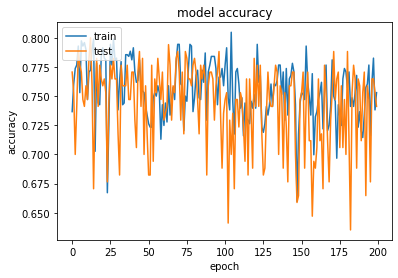

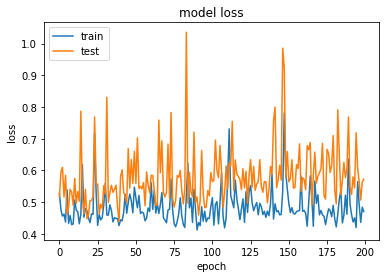

In [11]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
yval = model.predict_classes(Xtest)
print(yval)
print(Xtest)
print(Ytest)



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0 3 1 3 0 2 3 0 0 1 0 0 1 0 0 0 3 2 1 0 3 3 1 0 0 2 1 1 1 3 0 1 3 0 1 1 3
 3 2 2 1 1 2 1 2 0 1 1 1 1 1 3 3 0 3 3 0 0 2 1 1 1 2 1 1 0 0 3 3 1 0 1 3 3
 0 1 1 2 1 1 1 0 1 3 0 2 3 1 1 1 1 1 0 0 0 2 1 1 2 1 2 1 0 1 1 1 0 0 2 1 2
 1 0 0 0 1 3 3 1 2 1 1 1 0 1 1 0 1 1 1 1 2 2 3 1 0 0 1 1 3 1 0 1 1 3 3 0 0
 0 3 2 1 1 3 3 0 1 2 1 0 3 0 1 0 3 0 1 2 1 1]
     compactness  circularity  distance_circularity  radius_ratio  \
609     0.304348     0.346154              0.277778      0.052402   
416     0.347826     0.423077              0.416667      0.235808   
224     0.282609     0.307692              0.361111      0.126638   
363     0.347826     0.538462              0

In [27]:
#guardar modelo

#model.save("model_vehicle_silhouette_73.h5")
print("Saved model")

Saved model


In [5]:
#cargar modelo
from numpy import loadtxt
from keras.models import load_model

#hacer load de dataset primero. Ejecutar dos primeras celdas del codigo

model = load_model("./models/model_vehicle_silhouette_73.h5")#nombre del modelo
model.summary()
#hacer load de dataset
#evaluar modelo

scores = model.evaluate(Xtest, Ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                456       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 52        
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 918us/step - loss: 0.4477 - accuracy: 0.7118
accuracy: 71.18%
